# **The Sparks Foundation**
# **Author-Parth Keyur Gawande**


# **Task-3** 
#**Exploratory Data Analysis -Retail**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## **Read the dataset**

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **Number of rows and columns of the dataset**

In [4]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## **Check for null elements in the data**

In [6]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **NO null elements in the dataset**

In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

## **Drop the Postal code and Country column as Country is same for all the entries and no need for Postal code as Region is given**

In [8]:
df.drop(["Country","Postal Code"],axis=1,inplace=True)

##**Remove the duplicate entries in the Dataset**

In [9]:
df.duplicated().sum()

50

In [10]:
df.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##**View the data distribution of unique value of every column**

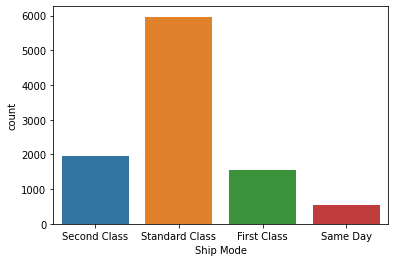

In [11]:

ax=sns.countplot(x=df['Ship Mode'])
#Mode of shipment wise data distribution


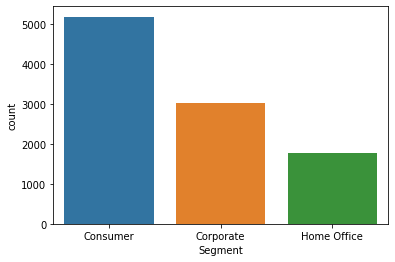

In [12]:
ax=sns.countplot(x=df['Segment'])
#Segment wise data distribution

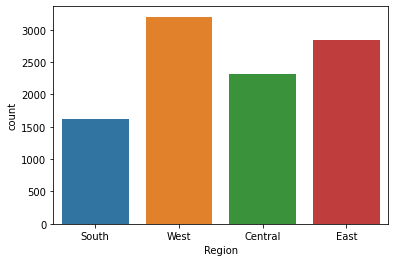

In [13]:
ax=sns.countplot(x=df['Region'])
#Region wise Data distribution

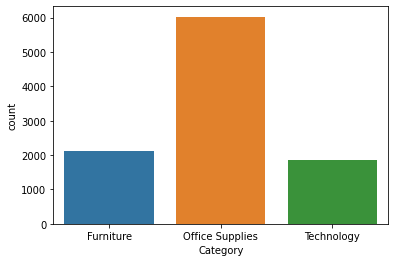

In [14]:
ax=sns.countplot(x=df['Category'])
#Category wise Data distribution

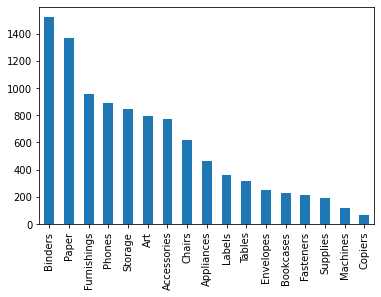

In [15]:
df['Sub-Category'].value_counts().plot.bar()
#Sub-Category wise distribution

In [16]:
df['Category'].value_counts().sum()

9994

In [17]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## **Summary of the dataset**

In [18]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


##**Correlation Heatmap**

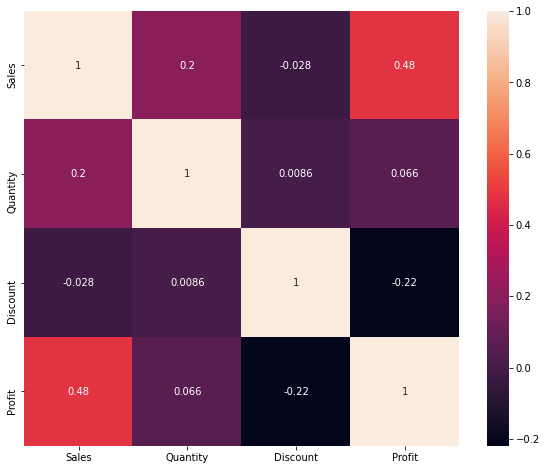

In [19]:
correlation = df.corr()
plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlation,square=True, annot=True)

##**Sub-Category v/s Category bar plot distribution**

<function matplotlib.pyplot.show>

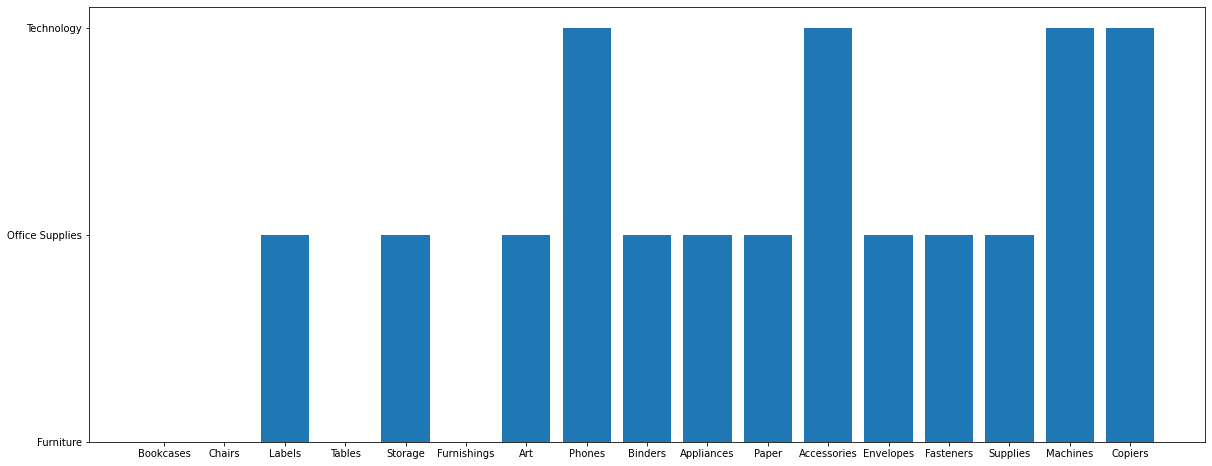

In [20]:
plt.figure(figsize=(20,8))
plt.bar('Sub-Category','Category',data=df)
plt.show

##**Pie-Chart for Sub-category wise distribution** 

<function matplotlib.pyplot.show>

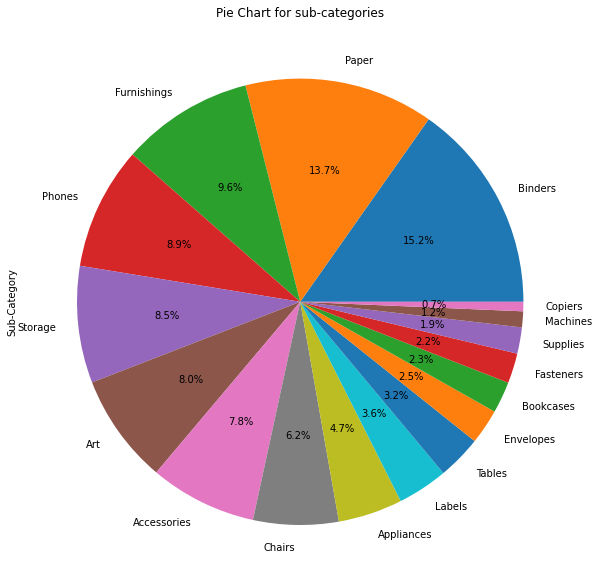

In [21]:
plt.figure(figsize=(10,15))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Pie Chart for sub-categories')
plt.show

##**Maximum sales are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers** 

In [22]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

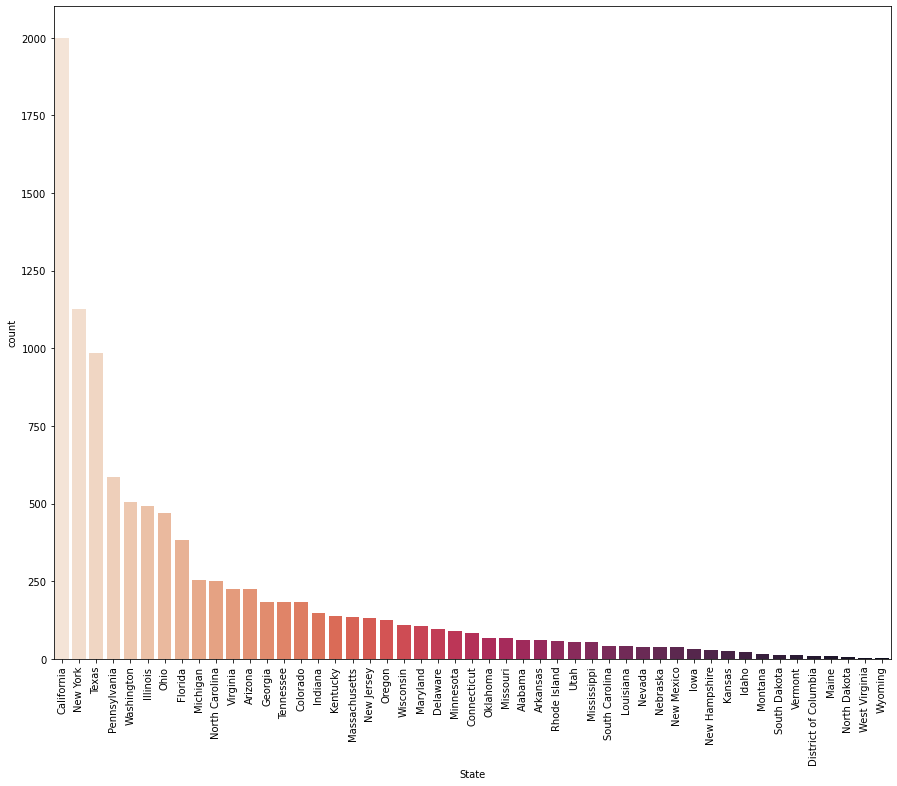

In [23]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

##**Highest number of buyers are from California and New York** 

##**Region wise Pie-chart distribution of sub-categories** 


<function matplotlib.pyplot.show>

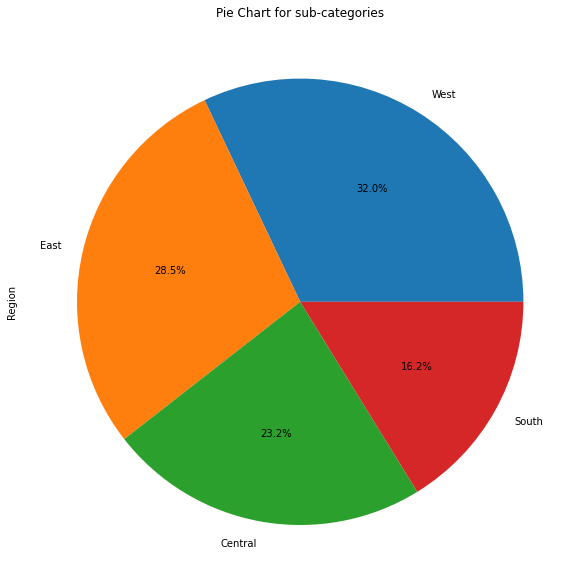

In [24]:
plt.figure(figsize=(10,15))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Pie Chart for sub-categories')
plt.show

## **Highest sales are in the West Region**





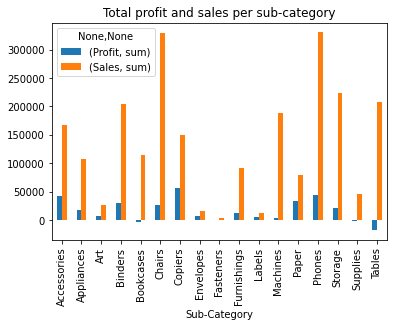

In [25]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per sub-category')
plt.rcParams['figure.figsize']=[25,12]
plt.show()

## **Chairs and Phones have the highest sales, labels and fasteners have the lowest**
## **Copiers and Accessories make the highest profit ,Tables suffer loss**

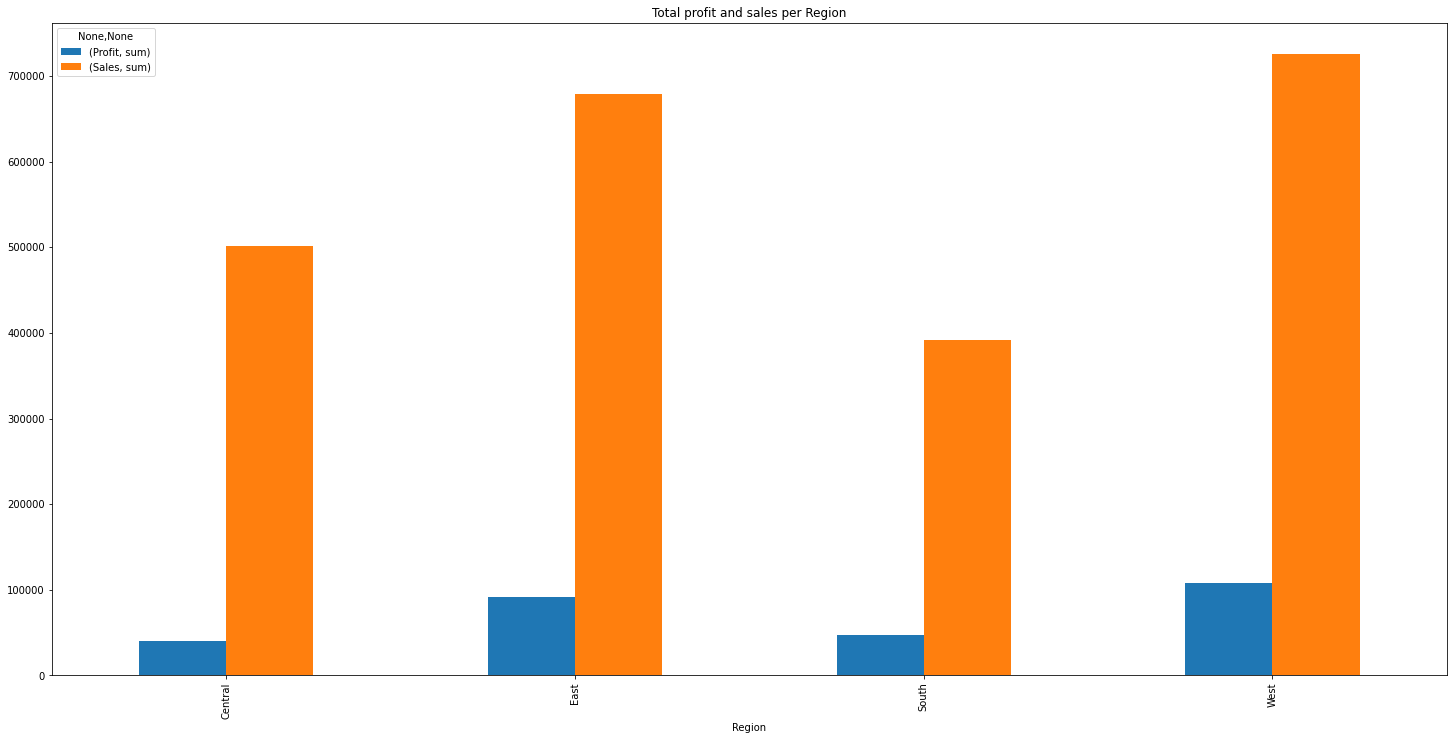

In [26]:
df.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per Region')
plt.rcParams['figure.figsize']=[8,5]
plt.show()

## **Highest Sales in the West Region and lowest in the south**
## **Most profits are from the west region with Central being the lowest**

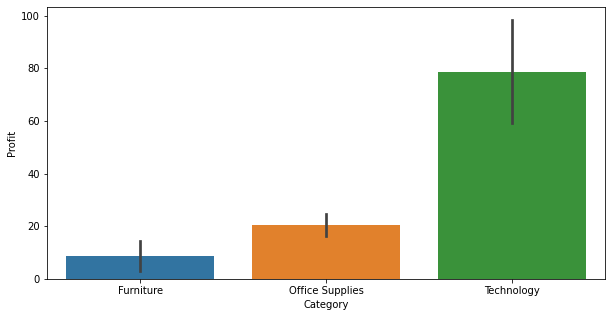

In [27]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=df['Category'],y=df['Profit'])

## **Technology sector makes the highest profit**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

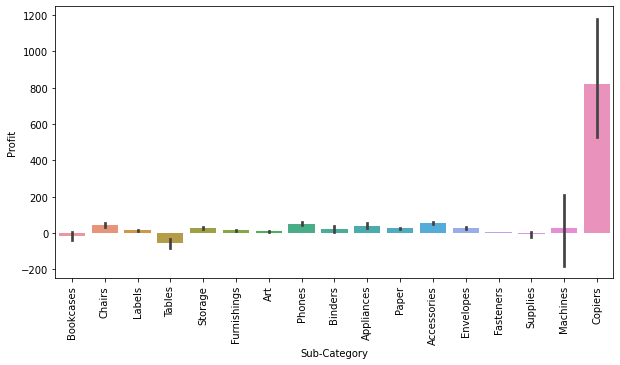

In [28]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=df['Sub-Category'],y=df['Profit'])
plt.xticks(rotation=90)

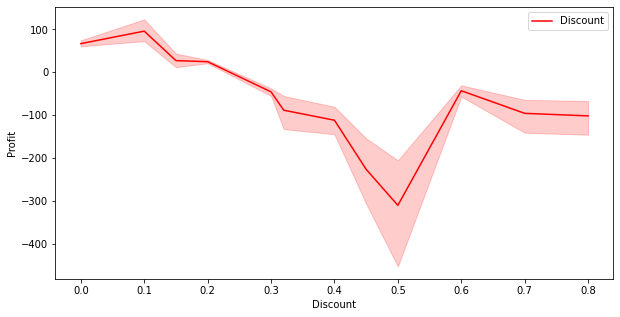

In [29]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.lineplot('Discount','Profit',data=df,color='r',label='Discount')

## **No correlation between profit and discount**

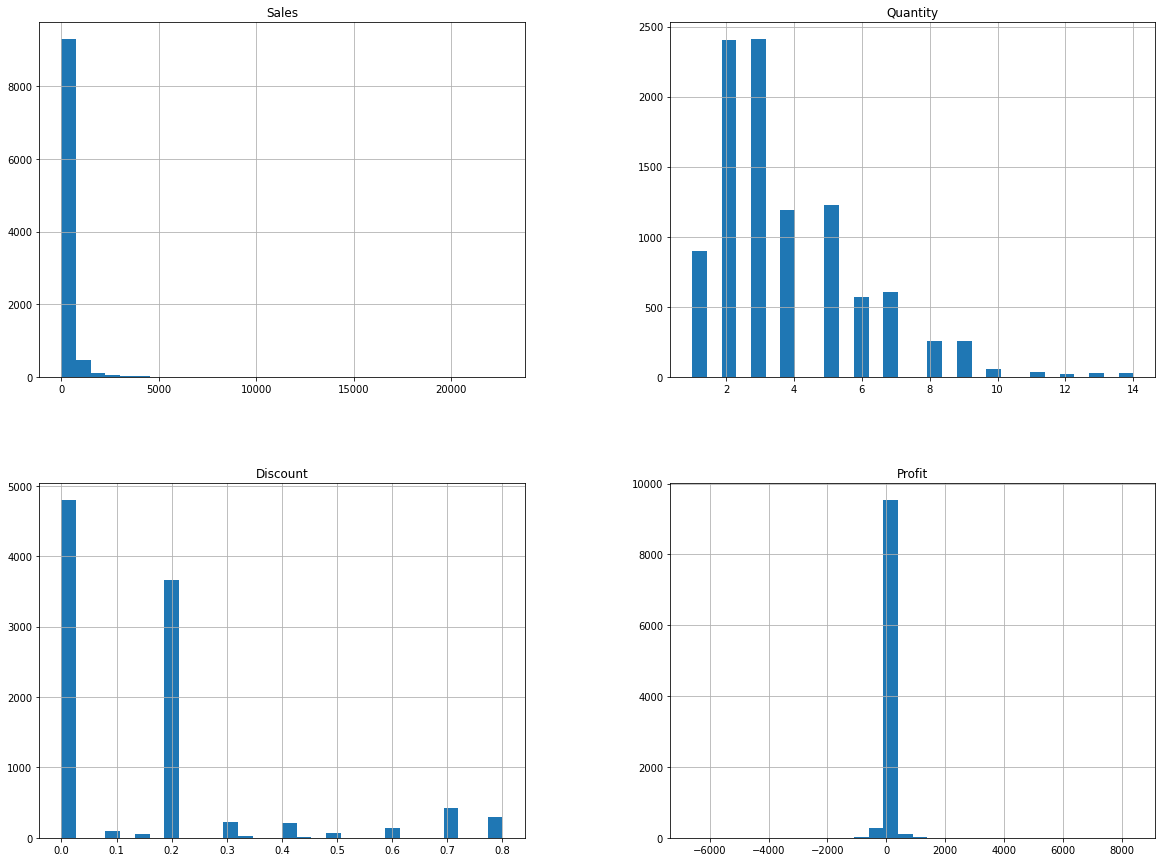

In [30]:
df.hist(bins=30,figsize=(20,15))
plt.show()

## **Most customers tends to buy quantity of 2 and 3**
## **Discount given maximum is 0 to 20 percent**

## **Profit vs Quantity**

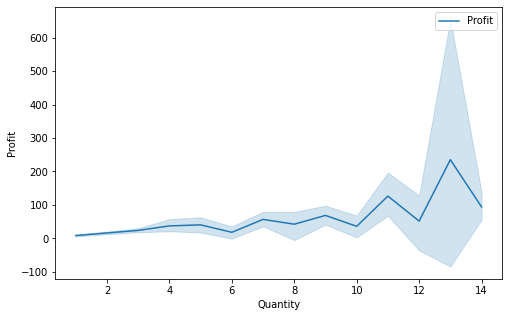

In [31]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

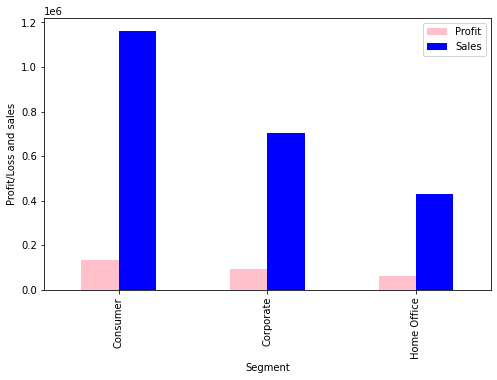

In [32]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

## **Profit and sales are maximum in consumer segment and minimum in Home Office segment**

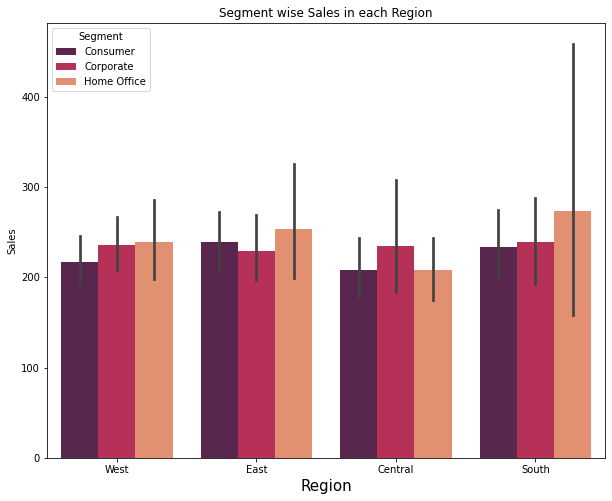

In [33]:
plt.figure(figsize=(10,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

## **Segment wise sales are almost same in every region**

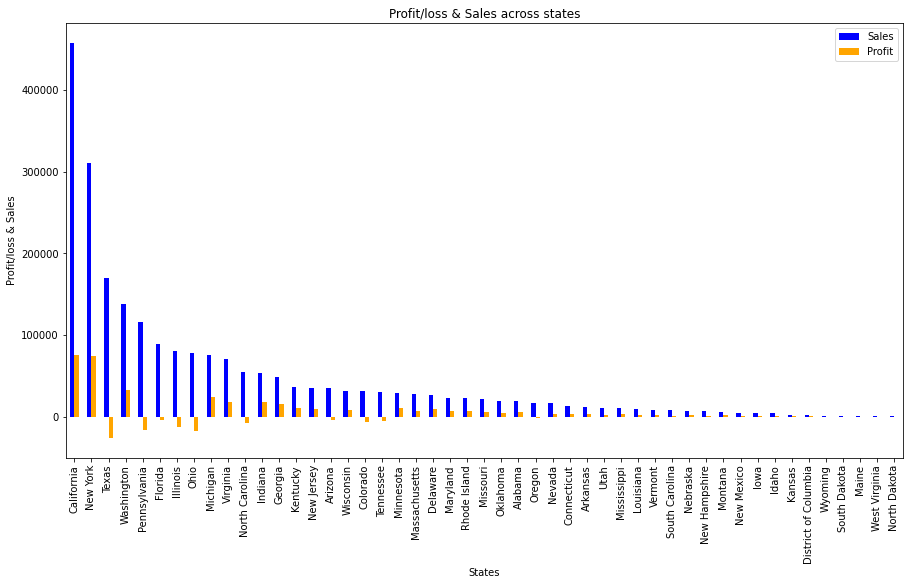

In [34]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

##**1. Highest profit is for California, New york** 
##**2.  Highest loss is for Texas, Pennsylvania, Ohio**

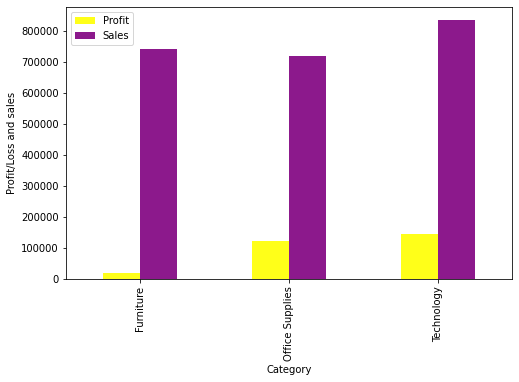

In [35]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

## **1. Technology and Office Supplies have high profit , Furniture have less profit**
## **2. This sector can be worked upon so as to increase the profits**

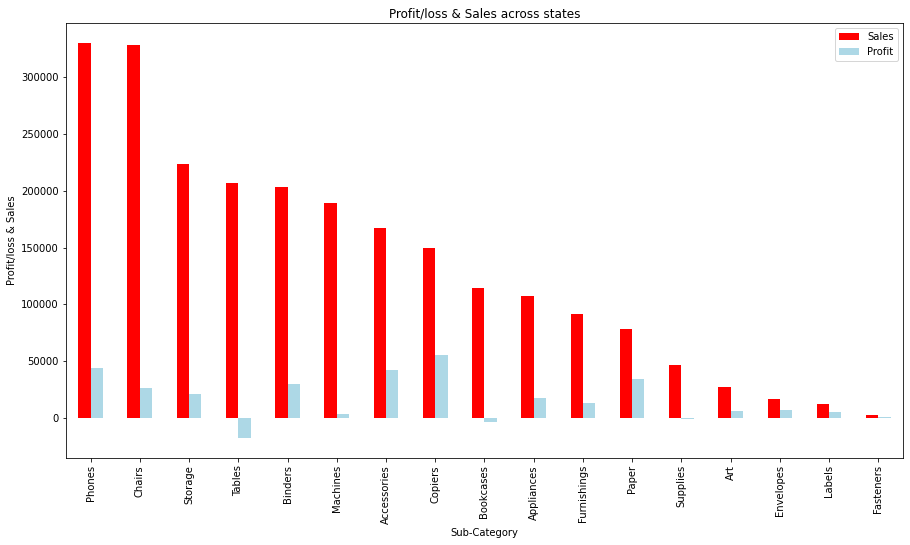

In [36]:

ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

##**1. Phones sub-category have high sales.**
##**2. Chairs have high sales but less profit compared to phones**
##**3. Tables and Bookmarks sub-categories are facing a huge loss**
